In [1]:
import os
import librosa
from sklearn.mixture import GaussianMixture
import numpy as np
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [18]:
folder_path= 'C:\\Users\\DELL\\Desktop\\Voiseed_task\\dev-clean'

In [15]:
speaker_file_path='C:\\Users\\DELL\\Desktop\\Voiseed_task\\SPEAKERS.TXT'

# Open the file in read mode
with open(speaker_file_path, 'r') as file:
    # Read the file line by line
    for line in file:
        # Check if the line contains "dev-clean"
        if "dev-clean" in line:
            parts = line.split('|')
            speaker_id = parts[0].strip()
            sex = parts[1].strip()

            folder_name = os.path.join(folder_path, speaker_id)

        # Check if the folder with speaker ID exists
        if os.path.exists(folder_name) and os.path.isdir(folder_name):
            # Rename the folder to include the sex information
            new_folder_name = f"{speaker_id}_{sex}"
            new_folder_path = os.path.join(folder_path, new_folder_name)
            os.rename(folder_name, new_folder_path)

NameError: name 'folder_name' is not defined

In [19]:
def extract_MFCC_features(file_path):
    # this function is used to extract MFCC features for fit in GMM，
    # transposing to ensure each MFCC features has a consistent format that aligns with the expectations of GMM
    y, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr).T
    return mfccs

In [20]:
# Function to extract audio features
def extract_audio_features(audio_path):
    # Load audio file
    y, sr = librosa.load(audio_path)

    # Calculate audio length (in seconds)
    length = librosa.get_duration(y=y, sr=sr)

    # Estimate tempo
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

    # Estimate fundamental frequency (F0)
    f0, _, _ = librosa.pyin(y, sr=sr, fmin=10, fmax=8000, frame_length=1024)
    mean_f0 = np.nanmean(f0)
    std_f0 = np.nanstd(f0)

    return length, tempo, mean_f0, std_f0


In [22]:
# List to store extracted features
data = []
# List to store extracted MFCCs and corresponding labels
mfccs_data = []
labels = []

# Iterate through speaker identity folders
print("Iterating through speaker identity folders...")
for speaker_folder in os.listdir(folder_path):
    speaker_path = os.path.join(folder_path, speaker_folder)
    if not os.path.isdir(speaker_path):
        continue

    sex = speaker_folder.split('_')[-1]  # Extract sex from folder name
    # Iterate through chapter folders
    print(f"Iterating through chapter folders in {speaker_folder}...")
    for chapter_folder in os.listdir(speaker_path):
        chapter_path = os.path.join(speaker_path, chapter_folder)
        if not os.path.isdir(chapter_path):
            continue

        # Iterate through audio files
        print(f"Iterating through audio files in {chapter_folder}...")
        for audio_file in os.listdir(chapter_path):
            if audio_file.endswith('.flac'):
                audio_path = os.path.join(chapter_path, audio_file)
                print(f"Processing audio file: {audio_path}")
                # Extract MFCCs
                mfccs = extract_MFCC_features(audio_path)
                mfccs_data.append(mfccs)
                labels.append(sex)

                # Extract audio features
                audio_length, tempo, mean_f0, std_f0 = extract_audio_features(audio_path)

                # Append to data list
                data.append([speaker_folder, sex, audio_file, audio_length, tempo, mean_f0, std_f0])

Iterating through speaker identity folders...
Iterating through chapter folders in 2902_M...
Iterating through audio files in 9006...
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\2902_M\9006\2902-9006-0000.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\2902_M\9006\2902-9006-0001.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\2902_M\9006\2902-9006-0002.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\2902_M\9006\2902-9006-0003.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\2902_M\9006\2902-9006-0004.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\2902_M\9006\2902-9006-0005.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\2902_M\9006\2902-9006-0006.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\2902_M\9006\2902-9006-0007.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clea

Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3000_M\15664\3000-15664-0041.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3000_M\15664\3000-15664-0042.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3000_M\15664\3000-15664-0043.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3000_M\15664\3000-15664-0044.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3000_M\15664\3000-15664-0045.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3000_M\15664\3000-15664-0046.flac
Iterating through chapter folders in 3170_M...
Iterating through audio files in 137482...
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3170_M\137482\3170-137482-0000.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3170_M\137482\3170-137482-0001.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3170_M\137482\3170-137

Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3536_F\23268\3536-23268-0023.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3536_F\23268\3536-23268-0024.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3536_F\23268\3536-23268-0025.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3536_F\23268\3536-23268-0026.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3536_F\23268\3536-23268-0027.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3536_F\23268\3536-23268-0028.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3536_F\23268\3536-23268-0029.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3536_F\23268\3536-23268-0030.flac
Iterating through audio files in 8226...
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3536_F\8226\3536-8226-0000.flac
Processing audio file: C:\Users\DELL\Deskto

Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3576_F\138058\3576-138058-0038.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3576_F\138058\3576-138058-0039.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3576_F\138058\3576-138058-0040.flac
Iterating through chapter folders in 3752_M...
Iterating through audio files in 4943...
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3752_M\4943\3752-4943-0000.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3752_M\4943\3752-4943-0001.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3752_M\4943\3752-4943-0002.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3752_M\4943\3752-4943-0003.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3752_M\4943\3752-4943-0004.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3752_M\4943\3752-4943-0005.flac


Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3752_M\4944\3752-4944-0047.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3752_M\4944\3752-4944-0048.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3752_M\4944\3752-4944-0049.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3752_M\4944\3752-4944-0050.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3752_M\4944\3752-4944-0051.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3752_M\4944\3752-4944-0052.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3752_M\4944\3752-4944-0053.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3752_M\4944\3752-4944-0054.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3752_M\4944\3752-4944-0055.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3752_M\4944\3752-4944-0056.flac


Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\3853_F\163249\3853-163249-0056.flac
Iterating through chapter folders in 5338_F...
Iterating through audio files in 24615...
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5338_F\24615\5338-24615-0000.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5338_F\24615\5338-24615-0001.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5338_F\24615\5338-24615-0002.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5338_F\24615\5338-24615-0003.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5338_F\24615\5338-24615-0004.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5338_F\24615\5338-24615-0005.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5338_F\24615\5338-24615-0006.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5338_F\24615\5338-24615-0

Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5536_M\43358\5536-43358-0018.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5536_M\43358\5536-43358-0019.flac
Iterating through audio files in 43359...
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5536_M\43359\5536-43359-0000.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5536_M\43359\5536-43359-0001.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5536_M\43359\5536-43359-0002.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5536_M\43359\5536-43359-0003.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5536_M\43359\5536-43359-0004.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5536_M\43359\5536-43359-0005.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5536_M\43359\5536-43359-0006.flac
Processing audio file: C:\Users\DELL\Des

Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5694_M\64029\5694-64029-0014.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5694_M\64029\5694-64029-0015.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5694_M\64029\5694-64029-0016.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5694_M\64029\5694-64029-0017.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5694_M\64029\5694-64029-0018.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5694_M\64029\5694-64029-0019.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5694_M\64029\5694-64029-0020.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5694_M\64029\5694-64029-0021.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5694_M\64029\5694-64029-0022.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5694_M\64029\5

Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5895_F\34622\5895-34622-0012.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5895_F\34622\5895-34622-0013.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5895_F\34622\5895-34622-0014.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5895_F\34622\5895-34622-0015.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5895_F\34622\5895-34622-0016.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5895_F\34622\5895-34622-0017.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5895_F\34622\5895-34622-0018.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5895_F\34622\5895-34622-0019.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5895_F\34622\5895-34622-0020.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\5895_F\34622\5

Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6241_M\61946\6241-61946-0005.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6241_M\61946\6241-61946-0006.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6241_M\61946\6241-61946-0007.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6241_M\61946\6241-61946-0008.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6241_M\61946\6241-61946-0009.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6241_M\61946\6241-61946-0010.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6241_M\61946\6241-61946-0011.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6241_M\61946\6241-61946-0012.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6241_M\61946\6241-61946-0013.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6241_M\61946\6

Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6295_M\244435\6295-244435-0034.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6295_M\244435\6295-244435-0035.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6295_M\244435\6295-244435-0036.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6295_M\244435\6295-244435-0037.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6295_M\244435\6295-244435-0038.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6295_M\244435\6295-244435-0039.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6295_M\244435\6295-244435-0040.flac
Iterating through audio files in 64301...
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6295_M\64301\6295-64301-0000.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6295_M\64301\6295-64301-0001.flac
Processing audio file: C:\

C:\Users\DELL\AppData\Local\Temp\ipykernel_5628\1023711704.py:14: RuntimeWarning: Mean of empty slice
  mean_f0 = np.nanmean(f0)
D:\Anaconda\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6313_F\66125\6313-66125-0013.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6313_F\66125\6313-66125-0014.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6313_F\66125\6313-66125-0015.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6313_F\66125\6313-66125-0016.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6313_F\66125\6313-66125-0017.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6313_F\66125\6313-66125-0018.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6313_F\66125\6313-66125-0019.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6313_F\66125\6313-66125-0020.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6313_F\66125\6313-66125-0021.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6313_F\66125\6

Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6313_F\76958\6313-76958-0029.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6313_F\76958\6313-76958-0030.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6313_F\76958\6313-76958-0031.flac
Iterating through chapter folders in 6319_F...
Iterating through audio files in 275224...
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6319_F\275224\6319-275224-0000.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6319_F\275224\6319-275224-0001.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6319_F\275224\6319-275224-0002.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6319_F\275224\6319-275224-0003.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6319_F\275224\6319-275224-0004.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6319_F\275224\63

Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6345_F\64257\6345-64257-0020.flac
Iterating through audio files in 93302...
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6345_F\93302\6345-93302-0000.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6345_F\93302\6345-93302-0001.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6345_F\93302\6345-93302-0002.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6345_F\93302\6345-93302-0003.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6345_F\93302\6345-93302-0004.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6345_F\93302\6345-93302-0005.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6345_F\93302\6345-93302-0006.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\6345_F\93302\6345-93302-0007.flac
Processing audio file: C:\Users\DELL\Des

Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\7850_F\281318\7850-281318-0011.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\7850_F\281318\7850-281318-0012.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\7850_F\281318\7850-281318-0013.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\7850_F\281318\7850-281318-0014.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\7850_F\281318\7850-281318-0015.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\7850_F\281318\7850-281318-0016.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\7850_F\281318\7850-281318-0017.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\7850_F\281318\7850-281318-0018.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\7850_F\281318\7850-281318-0019.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-cl

Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\7976_M\105575\7976-105575-0027.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\7976_M\105575\7976-105575-0028.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\7976_M\105575\7976-105575-0029.flac
Iterating through audio files in 110124...
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\7976_M\110124\7976-110124-0000.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\7976_M\110124\7976-110124-0001.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\7976_M\110124\7976-110124-0002.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\7976_M\110124\7976-110124-0003.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\7976_M\110124\7976-110124-0004.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\7976_M\110124\7976-110124-0005.flac
Processing audio file

Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\8297_M\275154\8297-275154-0027.flac
Iterating through audio files in 275155...
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\8297_M\275155\8297-275155-0000.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\8297_M\275155\8297-275155-0001.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\8297_M\275155\8297-275155-0002.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\8297_M\275155\8297-275155-0003.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\8297_M\275155\8297-275155-0004.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\8297_M\275155\8297-275155-0005.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\8297_M\275155\8297-275155-0006.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\8297_M\275155\8297-275155-0007.flac
Processing audio file

Iterating through audio files in 302203...
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\8842_F\302203\8842-302203-0000.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\8842_F\302203\8842-302203-0001.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\8842_F\302203\8842-302203-0002.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\8842_F\302203\8842-302203-0003.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\8842_F\302203\8842-302203-0004.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\8842_F\302203\8842-302203-0005.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\8842_F\302203\8842-302203-0006.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\8842_F\302203\8842-302203-0007.flac
Processing audio file: C:\Users\DELL\Desktop\Voiseed_task\dev-clean\8842_F\302203\8842-302203-0008.flac
Processing audio file

In [47]:
# Create DataFrame
columns = ['Speaker_ID', 'Sex', 'Chapter', 'Audio_Length', 'Tempo', 'Mean_F0', 'F0_Std']
df = pd.DataFrame(data, columns=columns)
df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1})
# Show the content of the DataFrame
print(df)

     Speaker_ID  Sex                Chapter  Audio_Length       Tempo  \
0        2902_M    0    2902-9006-0000.flac      4.800000  151.999081   
1        2902_M    0    2902-9006-0001.flac     23.070023  117.453835   
2        2902_M    0    2902-9006-0002.flac     11.875011   99.384014   
3        2902_M    0    2902-9006-0003.flac     14.800000  135.999178   
4        2902_M    0    2902-9006-0004.flac      3.800000  143.554688   
...         ...  ...                    ...           ...         ...   
1333     8842_F    1  8842-304647-0009.flac     11.955011   83.354335   
1334     8842_F    1  8842-304647-0010.flac     12.195011  161.499023   
1335     8842_F    1  8842-304647-0011.flac      8.755011   78.302557   
1336     8842_F    1  8842-304647-0012.flac      4.325034   95.703125   
1337     8842_F    1  8842-304647-0013.flac      8.875011  123.046875   

         Mean_F0      F0_Std  
0     140.477174   26.667376  
1     199.770139  161.748091  
2     200.362293  163.996629  

In [48]:
# Define the file path where you want to save the CSV file
csv_file_path = 'output.csv'

# Write DataFrame to CSV
df.to_csv(csv_file_path, index=False)

      Sex  Audio_Length
0    Male   4841.406667
1  Female   4841.886032


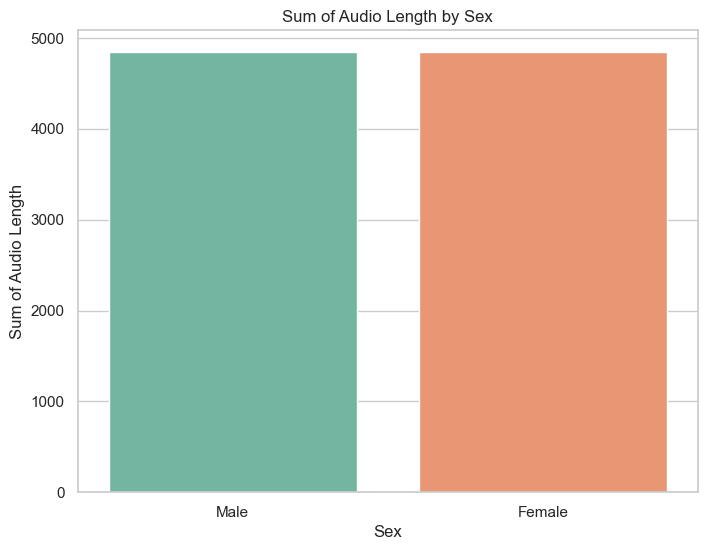

In [49]:
grouped_data = df.groupby('Sex')['Audio_Length'].sum().reset_index()

# Replace numeric labels with 'Male' and 'Female'
grouped_data['Sex'] = grouped_data['Sex'].map({0: 'Male', 1: 'Female'})

print(grouped_data)
# Plot the sum of audio length split by sex
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Audio_Length', data=grouped_data, palette='Set2')
plt.title('Sum of Audio Length by Sex')
plt.xlabel('Sex')
plt.ylabel('Sum of Audio Length')
plt.show()

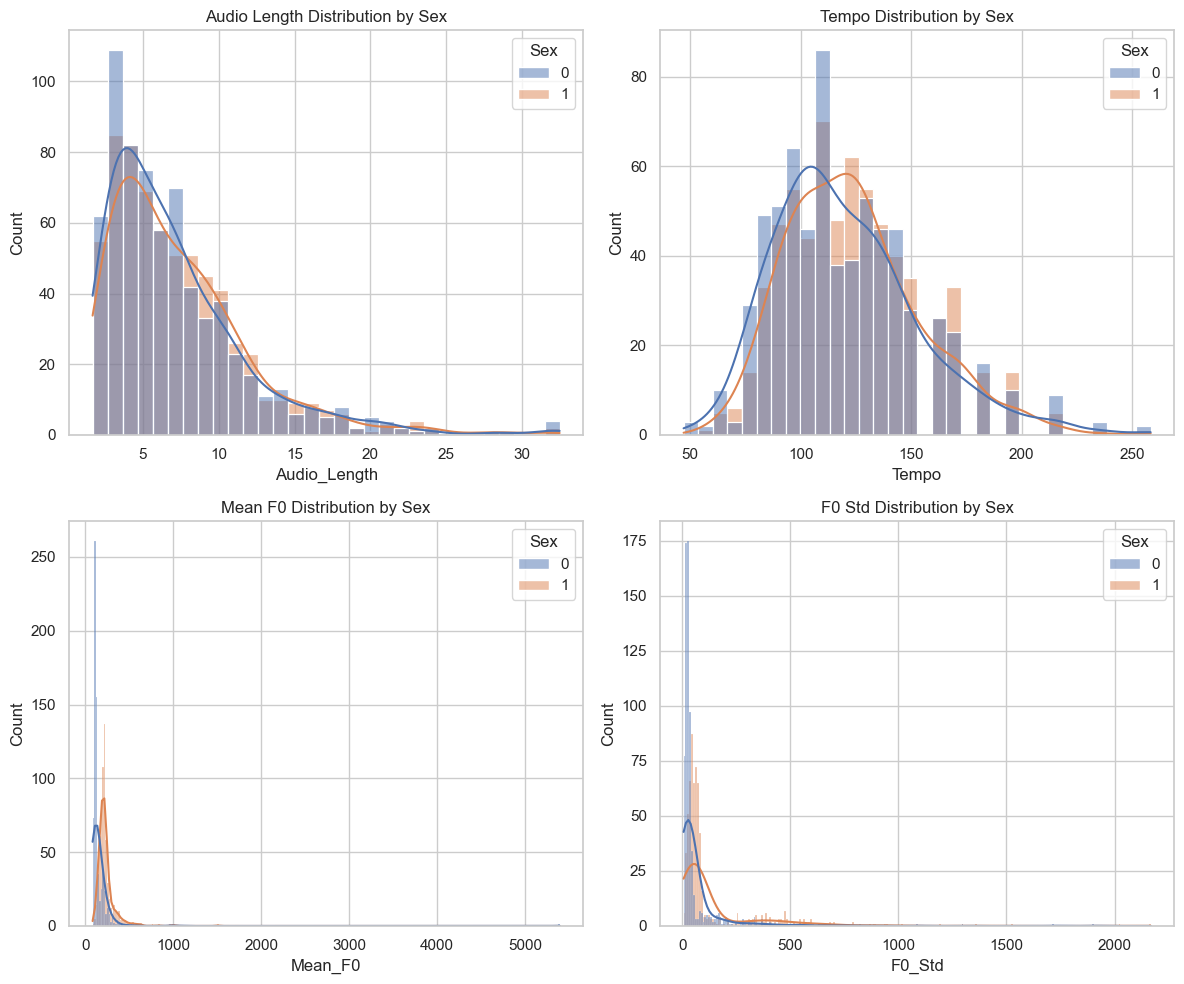

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set style for seaborn plots
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot distributions split by sex
sns.histplot(data=df, x='Audio_Length', hue='Sex', kde=True, ax=axes[0, 0])
sns.histplot(data=df, x='Tempo', hue='Sex', kde=True, ax=axes[0, 1])
sns.histplot(data=df, x='Mean_F0', hue='Sex', kde=True, ax=axes[1, 0])
sns.histplot(data=df, x='F0_Std', hue='Sex', kde=True, ax=axes[1, 1])

# Set titles for subplots
axes[0, 0].set_title('Audio Length Distribution by Sex')
axes[0, 1].set_title('Tempo Distribution by Sex')
axes[1, 0].set_title('Mean F0 Distribution by Sex')
axes[1, 1].set_title('F0 Std Distribution by Sex')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()